In [ ]:
!pip install geopandas
import geopandas
import pandas as pd

     |████████████████████████████████| 1.0 MB 8.9 MB/s 
     |████████████████████████████████| 15.4 MB 50.1 MB/s 
     |████████████████████████████████| 6.3 MB 48.2 MB/s 


1.caricare i quartieri in un geodataframe

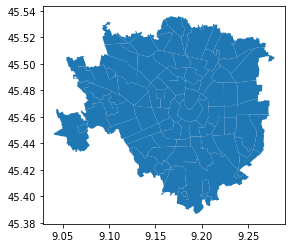

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf")
quartieri.plot()

2. visualizzare l'intestazione

In [ ]:
quartieri.head(0)

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry


3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico

In [ ]:
quartieri.sort_values(by=['NIL'], inplace = True)
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
65,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11963.033873,3.471750e+06,154,"POLYGON ((9.09315 45.46938, 9.09393 45.46802, ..."
57,52,BANDE NERE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6776.458948,2.663780e+06,146,"POLYGON ((9.12727 45.46894, 9.12874 45.46840, ..."
...,...,...,...,...,...,...,...,...,...
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((9.26378 45.43251, 9.26384 45.43248, ..."
44,28,UMBRIA - MOLISE - CALVAIRATE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4912.251168,1.192352e+06,133,"POLYGON ((9.22392 45.45969, 9.22392 45.45934, ..."
38,38,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127,"POLYGON ((9.20060 45.43608, 9.20429 45.43642, ..."
27,71,VILLAPIZZONE - CAGNOLA - BOLDINASCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8375.003494,3.426941e+06,116,"POLYGON ((9.16204 45.49690, 9.16012 45.49570, ..."


4. visualizzare tutti i quartieri su una mappa di Milano

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


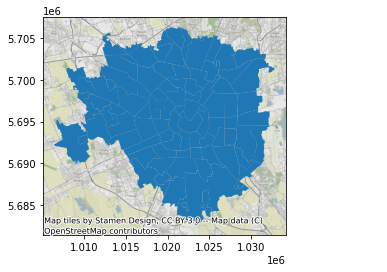

In [ ]:
!pip install contextily
import contextily as ctx
ax = quartieri.to_crs(epsg= 3857).plot()
ctx.add_basemap(ax)

5. cercare il quartiere che contiene il Duomo di Milano

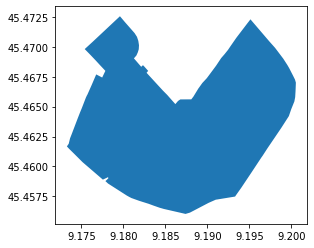

In [ ]:
from shapely.geometry import Point
duomo_milano = Point(9.191383,45.464211)
duomo = quartieri[quartieri.contains(duomo_milano)]
duomo.plot()

6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene

In [ ]:
import matplotlib.pyplot as plt


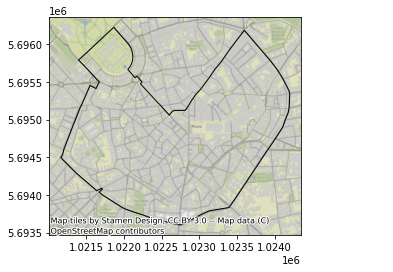

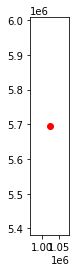

In [ ]:
ax = duomo.to_crs(epsg = 3857).plot(edgecolor = "k", facecolor = "None")
punto_duomo = geopandas.GeoSeries([duomo_milano], crs ="EPSG:4326").to_crs(epsg=3857).plot( color = "red")
ctx.add_basemap(ax)

7. visualizzare i quartieri vicini a quello che contiene il Duomo

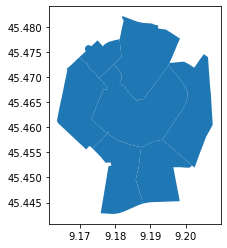

In [ ]:
quartieri[quartieri.intersects(duomo.geometry.squeeze())].plot()